# SPARKLING DATASET


In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import calendar
from pylab import rcParams

In [39]:
df = pd.read_csv("Sparkling.csv", parse_dates=['YearMonth'], index_col='YearMonth')

In [40]:
df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [41]:
df.dtypes

Sparkling    int64
dtype: object

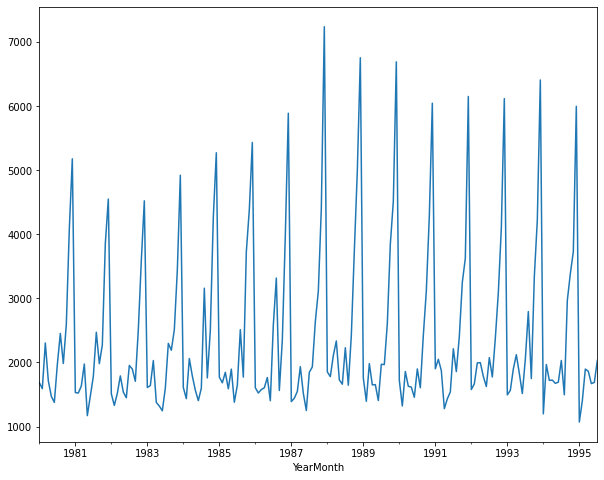

In [42]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
df['Sparkling'].plot()
plt.show()

In [43]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [44]:
df['Sparkling'].isnull().sum()

0

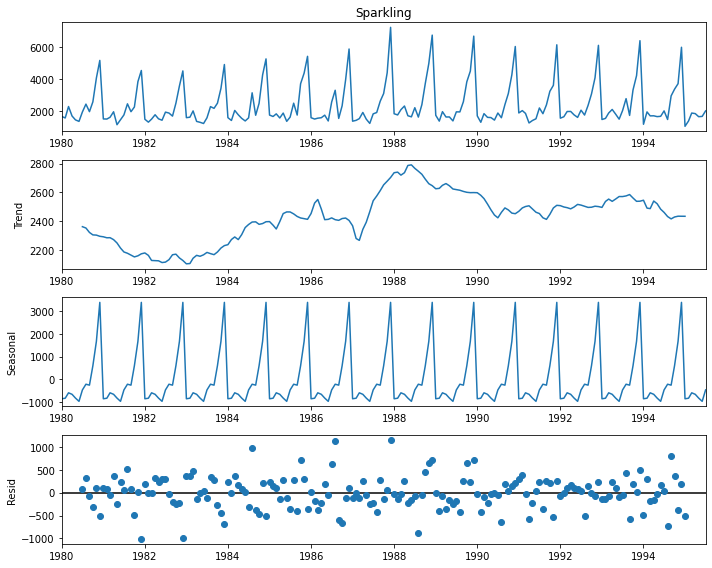

In [45]:
df_add_decompose = seasonal_decompose(df['Sparkling'],model = 'additive', period=12)
df_add_decompose.plot()
plt.show()

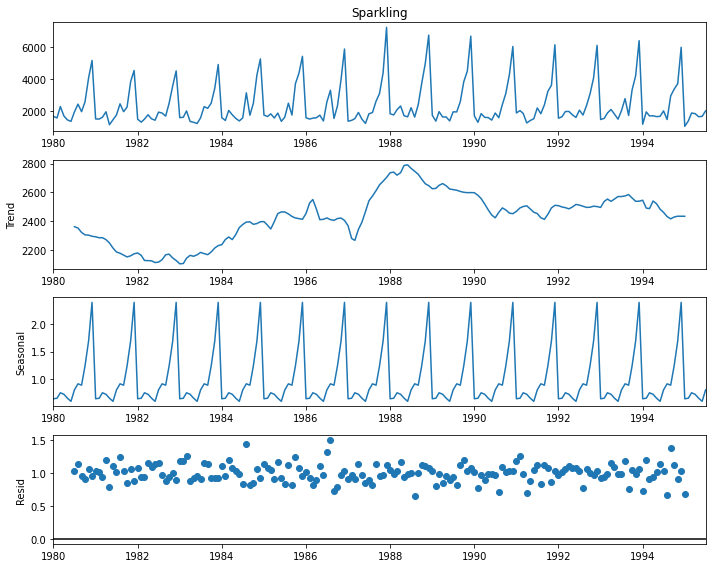

In [46]:
df_multi_decompose = seasonal_decompose(df['Sparkling'], model='multiplicative', period = 12)
df_multi_decompose.plot()
plt.show()

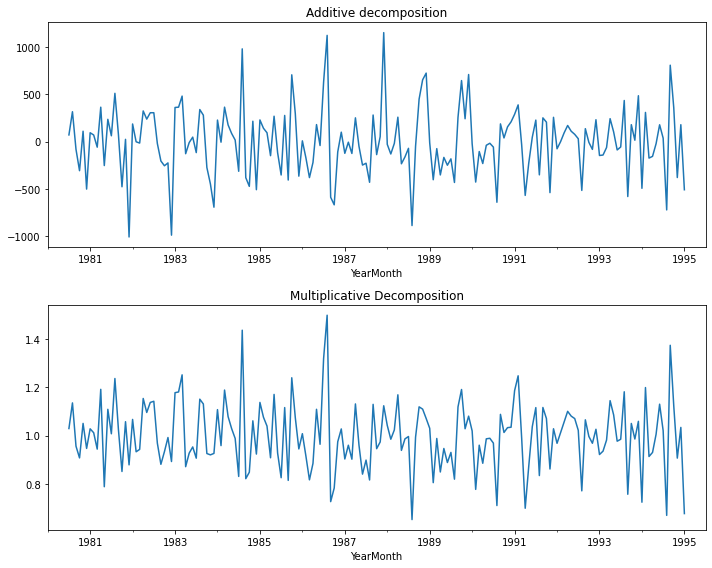

In [47]:
plt.subplot(2,1,1)
plt.title('Additive decomposition')
df_add_decompose.resid.plot()


plt.subplot(2,1,2)
plt.title('Multiplicative Decomposition')
df_multi_decompose.resid.plot()
plt.tight_layout()
plt.show()

In [48]:
df['Month'] = df.index.month
df['Year'] = df.index.year

In [49]:
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df.head()

,Sparkling,Month,Year
YearMonth,,,
1980-01-01,1686,Jan,1980
1980-02-01,1591,Feb,1980
1980-03-01,2304,Mar,1980
1980-04-01,1712,Apr,1980
1980-05-01,1471,May,1980


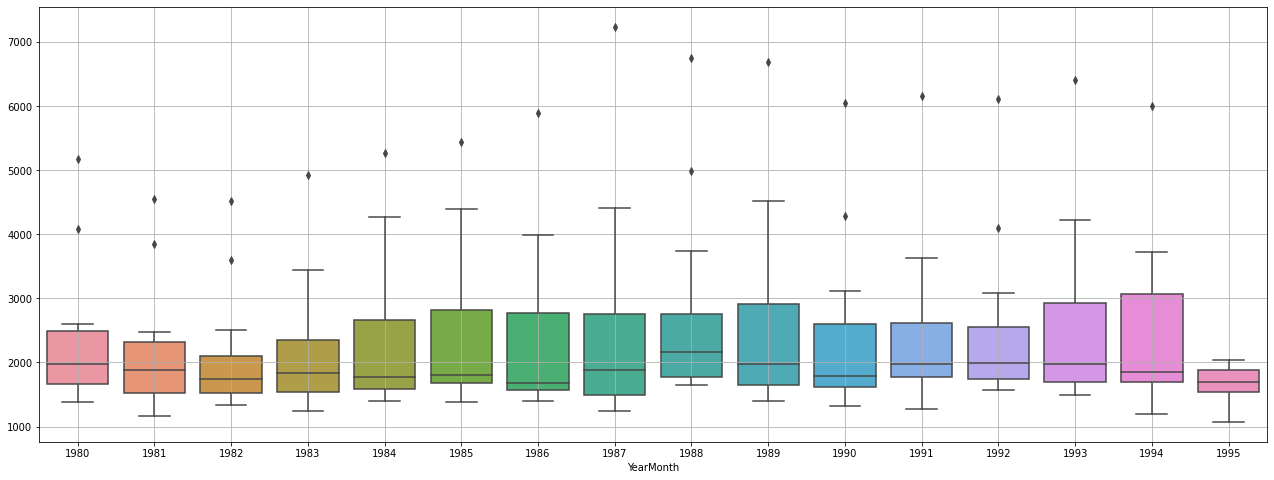

In [154]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

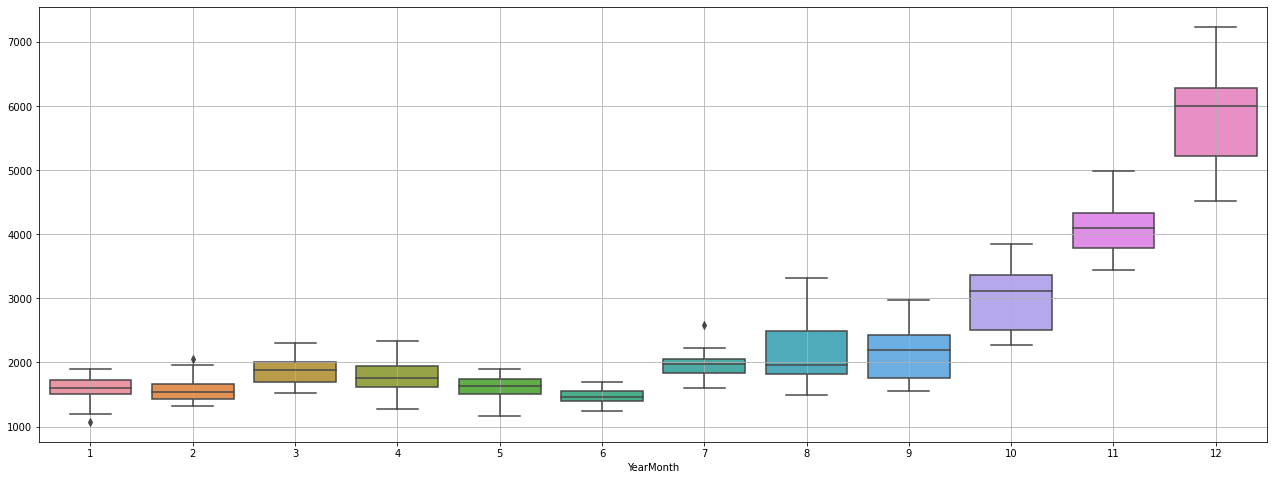

In [155]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month,y = df.values[:,0],ax=ax)
plt.grid();

## SPLIT DATA

In [52]:
df.head()

,Sparkling,Month,Year
YearMonth,,,
1980-01-01,1686,Jan,1980
1980-02-01,1591,Feb,1980
1980-03-01,2304,Mar,1980
1980-04-01,1712,Apr,1980
1980-05-01,1471,May,1980


In [53]:
test = df['01-01-1991':]
train = df[:'01-01-1991']

In [54]:
test.head()

,Sparkling,Month,Year
YearMonth,,,
1991-01-01,1902,Jan,1991
1991-02-01,2049,Feb,1991
1991-03-01,1874,Mar,1991
1991-04-01,1279,Apr,1991
1991-05-01,1432,May,1991


In [55]:
print(train.shape)
print(test.shape)

(133, 3)
(55, 3)


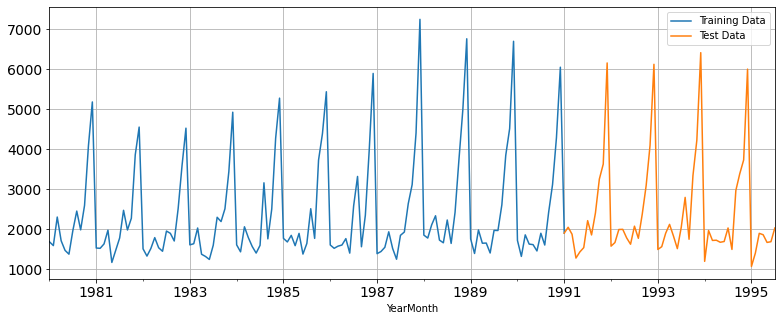

In [56]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [57]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+134 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133]
Test Time instance 
 [134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188]


## LINEAR REGRESSION

In [58]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [59]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time


In [60]:
lr = LinearRegression()

In [61]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

In [62]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [63]:
from sklearn import metrics

In [64]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1377.729


In [65]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1377.729202


In [66]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

## SIMPLE EXPONENTIAL SMOOTHING

In [67]:
SES_train = train.copy()
SES_test = test.copy()

In [68]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [69]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [70]:
model_SES_autofit.params

{'smoothing_level': 0.055569495557200844,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1896.819818417072,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [71]:
test_predictions_model2 = model_SES_autofit.forecast(steps=len(test))
test_predictions_model2

1991-02-01    2702.279568
1991-03-01    2702.279568
1991-04-01    2702.279568
1991-05-01    2702.279568
1991-06-01    2702.279568
1991-07-01    2702.279568
1991-08-01    2702.279568
1991-09-01    2702.279568
1991-10-01    2702.279568
1991-11-01    2702.279568
1991-12-01    2702.279568
1992-01-01    2702.279568
1992-02-01    2702.279568
1992-03-01    2702.279568
1992-04-01    2702.279568
1992-05-01    2702.279568
1992-06-01    2702.279568
1992-07-01    2702.279568
1992-08-01    2702.279568
1992-09-01    2702.279568
1992-10-01    2702.279568
1992-11-01    2702.279568
1992-12-01    2702.279568
1993-01-01    2702.279568
1993-02-01    2702.279568
1993-03-01    2702.279568
1993-04-01    2702.279568
1993-05-01    2702.279568
1993-06-01    2702.279568
1993-07-01    2702.279568
1993-08-01    2702.279568
1993-09-01    2702.279568
1993-10-01    2702.279568
1993-11-01    2702.279568
1993-12-01    2702.279568
1994-01-01    2702.279568
1994-02-01    2702.279568
1994-03-01    2702.279568
1994-04-01  

In [72]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1310.611


In [73]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]}
                              ,index=['Alpha=0.0555:SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1377.729202
Alpha=0.0555:SimpleExponentialSmoothing,1310.611466


## DOUBLE EXPONENTIAL SMOOTHIGN

In [79]:
DES_train = train.copy()
DES_test = test.copy()

In [80]:
model_DES = Holt(SES_train['Sparkling'])

In [81]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [82]:
model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.617857,True
smoothing_trend,beta,0.000100,True
initial_level,l.0,1686.000000,True
initial_trend,b.0,-95.000000,True


In [83]:
test_predictions_model3 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model3

1991-02-01    2991.145773
1991-03-01    2897.540000
1991-04-01    2803.934228
1991-05-01    2710.328455
1991-06-01    2616.722683
1991-07-01    2523.116910
1991-08-01    2429.511138
1991-09-01    2335.905365
1991-10-01    2242.299593
1991-11-01    2148.693820
1991-12-01    2055.088048
1992-01-01    1961.482275
1992-02-01    1867.876502
1992-03-01    1774.270730
1992-04-01    1680.664957
1992-05-01    1587.059185
1992-06-01    1493.453412
1992-07-01    1399.847640
1992-08-01    1306.241867
1992-09-01    1212.636095
1992-10-01    1119.030322
1992-11-01    1025.424550
1992-12-01     931.818777
1993-01-01     838.213004
1993-02-01     744.607232
1993-03-01     651.001459
1993-04-01     557.395687
1993-05-01     463.789914
1993-06-01     370.184142
1993-07-01     276.578369
1993-08-01     182.972597
1993-09-01      89.366824
1993-10-01      -4.238948
1993-11-01     -97.844721
1993-12-01    -191.450494
1994-01-01    -285.056266
1994-02-01    -378.662039
1994-03-01    -472.267811
1994-04-01  

In [84]:


rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model3,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 2773.916


In [85]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                              ,index=['Alpha=0.617,Beta=0.000100:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1377.729202
Alpha=0.0555:SimpleExponentialSmoothing,1310.611466
"Alpha=0.617,Beta=0.000100:DoubleExponentialSmoothing",2773.915963


## TRIPLE EXPONENTIAL SMOOTHING

In [86]:
TES_train = train.copy()
TES_test = test.copy()

In [87]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='multiplicative',seasonal='multiplicative')

In [88]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [89]:
model_TES_autofit.params

{'smoothing_level': 0.07575783092625316,
 'smoothing_trend': 0.07575429310239983,
 'smoothing_seasonal': 0.37652602423176784,
 'damping_trend': nan,
 'initial_level': 1661.760764211867,
 'initial_trend': 0.9960386966755097,
 'initial_seasons': array([1.04812497, 1.00389491, 1.39427742, 1.18208504, 0.95439688,
        0.95479457, 1.26793981, 1.61288611, 1.3113493 , 1.71717363,
        2.67610494, 3.39051897]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [90]:
test_predictions_model4 = model_TES_autofit.forecast(steps=len(test))
test_predictions_model4

1991-02-01    1390.702517
1991-03-01    1806.625035
1991-04-01    1693.859976
1991-05-01    1574.570827
1991-06-01    1384.753362
1991-07-01    1892.630448
1991-08-01    1843.584589
1991-09-01    2312.732409
1991-10-01    3184.157934
1991-11-01    4220.047322
1991-12-01    6020.962462
1992-01-01    1586.373574
1992-02-01    1350.531574
1992-03-01    1754.440020
1992-04-01    1644.932221
1992-05-01    1529.088781
1992-06-01    1344.754262
1992-07-01    1837.961136
1992-08-01    1790.331984
1992-09-01    2245.928299
1992-10-01    3092.182385
1992-11-01    4098.149734
1992-12-01    5847.044791
1993-01-01    1540.550601
1993-02-01    1311.520982
1993-03-01    1703.762387
1993-04-01    1597.417760
1993-05-01    1484.920501
1993-06-01    1305.910551
1993-07-01    1784.870966
1993-08-01    1738.617599
1993-09-01    2181.053851
1993-10-01    3002.863582
1993-11-01    3979.773202
1993-12-01    5678.150795
1994-01-01    1496.051242
1994-02-01    1273.637226
1994-03-01    1654.548597
1994-04-01  

In [91]:
rmse_model4_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model4,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1419.956


In [92]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model4_test]}
                              ,index=['Alpha=0.0757,Beta=0.0757,Gamma=0.376:TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1377.729202
Alpha=0.0555:SimpleExponentialSmoothing,1310.611466
"Alpha=0.617,Beta=0.000100:DoubleExponentialSmoothing",2773.915963
"Alpha=0.0757,Beta=0.0757,Gamma=0.376:TripleExponentialSmoothing",1419.955981


## NAIVE MODEL

In [93]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [94]:
train.tail()

,Sparkling,Month,Year
YearMonth,,,
1990-09-01,2424,Sep,1990
1990-10-01,3116,Oct,1990
1990-11-01,4286,Nov,1990
1990-12-01,6047,Dec,1990
1991-01-01,1902,Jan,1991


In [95]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    1902
1991-02-01    1902
1991-03-01    1902
1991-04-01    1902
1991-05-01    1902
Name: naive, dtype: int64

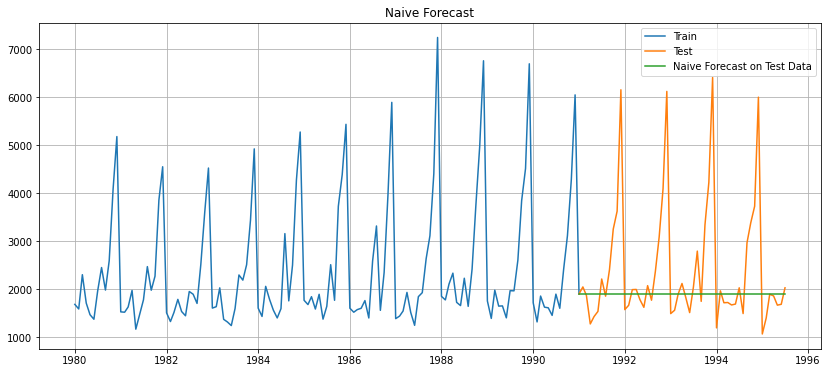

In [96]:
plt.subplots(figsize=(14,6))

plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [97]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For Naive Bayes forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive Bayes forecast on the Test Data,  RMSE is 1368.563


In [98]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1377.729202
Alpha=0.0555:SimpleExponentialSmoothing,1310.611466
"Alpha=0.617,Beta=0.000100:DoubleExponentialSmoothing",2773.915963
"Alpha=0.0757,Beta=0.0757,Gamma=0.376:TripleExponentialSmoothing",1419.955981
NaiveModel,1368.563381


## SIMPLE AVERAGE

In [99]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [100]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,Month,Year,mean_forecast
YearMonth,,,,
1991-01-01,1902,Jan,1991,2400.007519
1991-02-01,2049,Feb,1991,2400.007519
1991-03-01,1874,Mar,1991,2400.007519
1991-04-01,1279,Apr,1991,2400.007519
1991-05-01,1432,May,1991,2400.007519


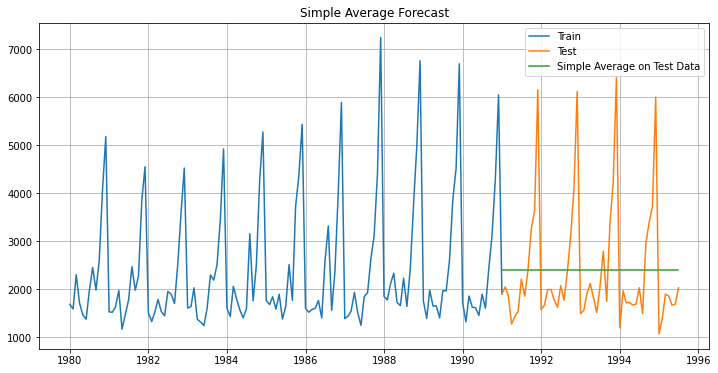

In [101]:
plt.subplots(figsize=(12,6))

plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [102]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.074


In [103]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1377.729202
Alpha=0.0555:SimpleExponentialSmoothing,1310.611466
"Alpha=0.617,Beta=0.000100:DoubleExponentialSmoothing",2773.915963
"Alpha=0.0757,Beta=0.0757,Gamma=0.376:TripleExponentialSmoothing",1419.955981
NaiveModel,1368.563381
SimpleAverageModel,1275.073671


## MOVING AVERAGE

In [104]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling,Month,Year
YearMonth,,,
1980-01-01,1686,Jan,1980
1980-02-01,1591,Feb,1980
1980-03-01,2304,Mar,1980
1980-04-01,1712,Apr,1980
1980-05-01,1471,May,1980


In [105]:
MovingAverage['Trailing_3'] = MovingAverage['Sparkling'].rolling(3).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()
MovingAverage['Trailing_12'] = MovingAverage['Sparkling'].rolling(12).mean()

MovingAverage.head()


,Sparkling,Month,Year,Trailing_3,Trailing_6,Trailing_9,Trailing_12
YearMonth,,,,,,,
1980-01-01,1686,Jan,1980,NaN,NaN,NaN,NaN
1980-02-01,1591,Feb,1980,NaN,NaN,NaN,NaN
1980-03-01,2304,Mar,1980,1860.333333,NaN,NaN,NaN
1980-04-01,1712,Apr,1980,1869.000000,NaN,NaN,NaN
1980-05-01,1471,May,1980,1829.000000,NaN,NaN,NaN


In [106]:
MovingAverage.shape

(187, 7)

In [107]:
df.shape

(187, 3)

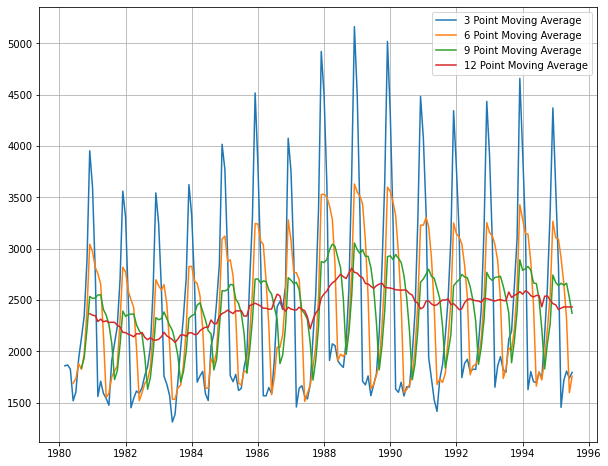

In [108]:

plt.plot(MovingAverage['Trailing_3'], label='3 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'], label='6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.plot(MovingAverage['Trailing_12'],label = '12 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [109]:

trailing_MovingAverage_train=MovingAverage[0:len(train)] 
trailing_MovingAverage_test=MovingAverage[len(train)-1:]

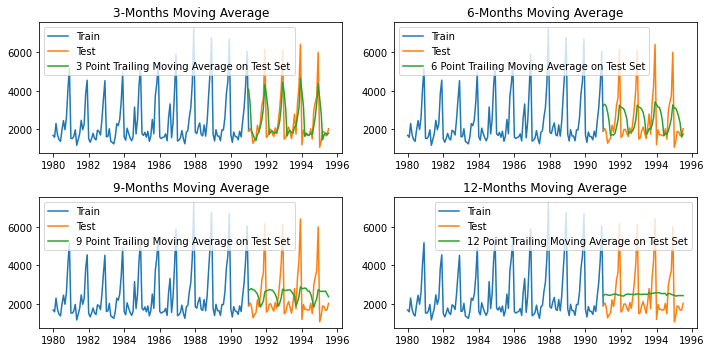

In [110]:

fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(10)
fig.set_figheight(5)

axes[0][0].plot(trailing_MovingAverage_train['Sparkling'], label='Train')
axes[0][0].plot(trailing_MovingAverage_test['Sparkling'], label='Test')

axes[0][0].plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Test Set')
axes[0][0].set_title("3-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(trailing_MovingAverage_train['Sparkling'], label='Train')
axes[0][1].plot(trailing_MovingAverage_test['Sparkling'], label='Test')

axes[0][1].plot(trailing_MovingAverage_test['Trailing_6'], label='6 Point Trailing Moving Average on Test Set')
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(trailing_MovingAverage_train['Sparkling'], label='Train')
axes[1][0].plot(trailing_MovingAverage_test['Sparkling'], label='Test')

axes[1][0].plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
axes[1][0].set_title("9-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(trailing_MovingAverage_train['Sparkling'], label='Train')
axes[1][1].plot(trailing_MovingAverage_test['Sparkling'], label='Test')

axes[1][1].plot(trailing_MovingAverage_test['Trailing_12'],label = '12 Point Trailing Moving Average on Test Set')
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()

In [111]:
## Test Data - RMSE  - 3 point Trailing MA

rmse_model4_test_3 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_3'],squared=False)
print("For 3 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_3))

## Test Data - RMSE - 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE - 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

## Test Data - RMSE - 12 point Trailing MA

rmse_model4_test_12 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_12'],squared=False)
print("For 12 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_12))

For 3 point Moving Average Model forecast on the Training Data,  RMSE is 1028.606
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278
For 12 point Moving Average Model forecast on the Training Data,  RMSE is 1267.925


In [112]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_3,rmse_model4_test_6
                                          ,rmse_model4_test_9,rmse_model4_test_12]}
                           ,index=['3pointTrailingMovingAverage','6pointTrailingMovingAverage'
                                   ,'9pointTrailingMovingAverage','12pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1377.729202
Alpha=0.0555:SimpleExponentialSmoothing,1310.611466
"Alpha=0.617,Beta=0.000100:DoubleExponentialSmoothing",2773.915963
"Alpha=0.0757,Beta=0.0757,Gamma=0.376:TripleExponentialSmoothing",1419.955981
NaiveModel,1368.563381
SimpleAverageModel,1275.073671
3pointTrailingMovingAverage,1028.605756
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
12pointTrailingMovingAverage,1267.925330


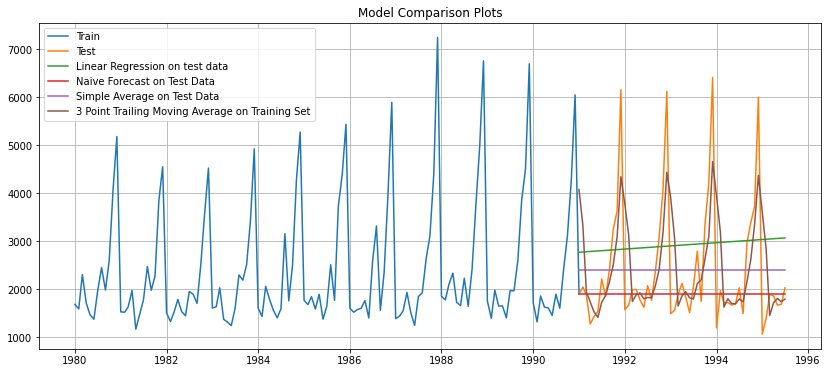

In [113]:

plt.subplots(figsize = (14,6))

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression on test data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## ARIMA 

In [114]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

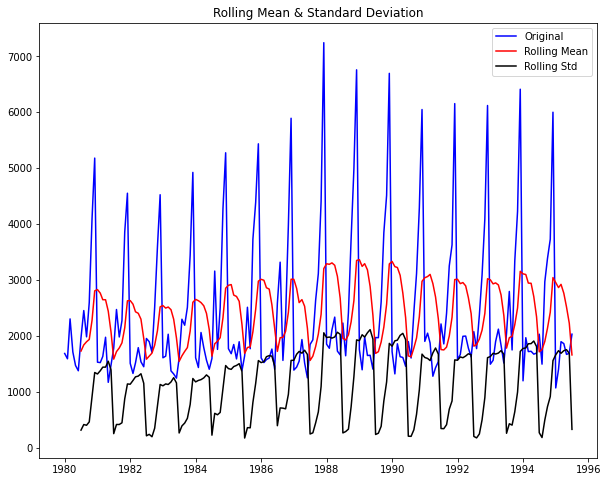

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [116]:
test_stationarity(df['Sparkling'])

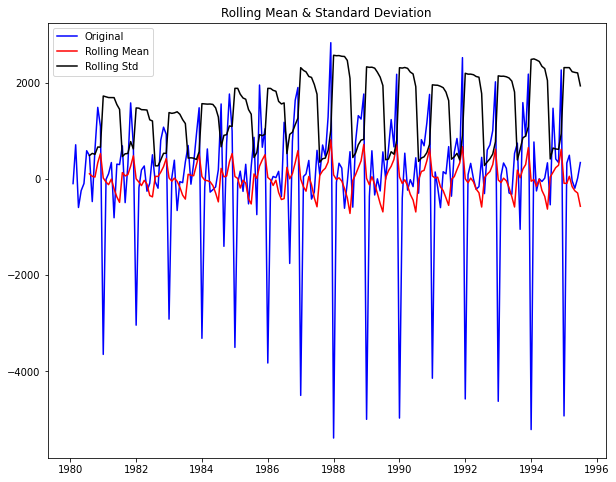

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [118]:
test_stationarity(df['Sparkling'].diff().dropna())

In [119]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

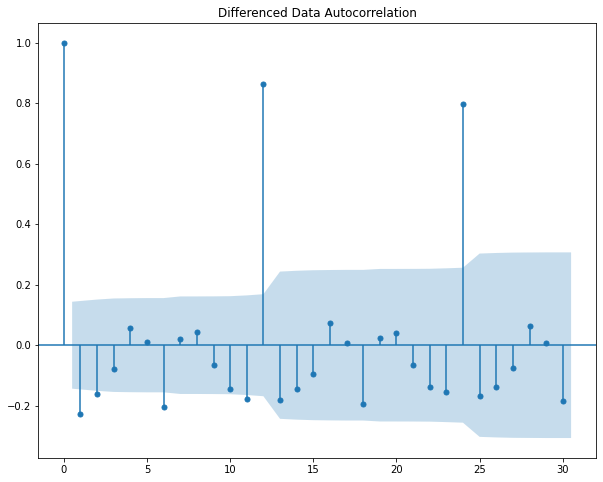

In [120]:
# plot_acf(df['RetailSales'],lags=30)
plot_acf(df['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plt.show()

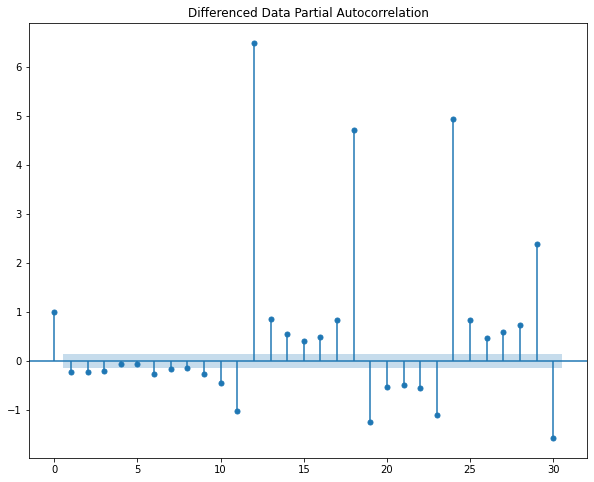

In [121]:
# plot_pacf(df['RetailSales'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Partial Autocorrelation')
plt.show()

### SPLIT THE DATA

In [122]:
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']

In [123]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [124]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling,Month,Year
YearMonth,,,
1980-01-01,1686,Jan,1980
1980-02-01,1591,Feb,1980
1980-03-01,2304,Mar,1980
1980-04-01,1712,Apr,1980
1980-05-01,1471,May,1980


Last few rows of Training Data


,Sparkling,Month,Year
YearMonth,,,
1990-08-01,1605,Aug,1990
1990-09-01,2424,Sep,1990
1990-10-01,3116,Oct,1990
1990-11-01,4286,Nov,1990
1990-12-01,6047,Dec,1990


First few rows of Test Data


,Sparkling,Month,Year
YearMonth,,,
1991-01-01,1902,Jan,1991
1991-02-01,2049,Feb,1991
1991-03-01,1874,Mar,1991
1991-04-01,1279,Apr,1991
1991-05-01,1432,May,1991


Last few rows of Test Data


,Sparkling,Month,Year
YearMonth,,,
1995-03-01,1897,Mar,1995
1995-04-01,1862,Apr,1995
1995-05-01,1670,May,1995
1995-06-01,1688,Jun,1995
1995-07-01,2031,Jul,1995


In [125]:
print(train.shape)
print(test.shape)

(132, 3)
(55, 3)


### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [126]:
from statsmodels.tsa.arima_model import ARIMA

In [127]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [128]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [129]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.9064376843794
ARIMA(0, 1, 2) - AIC:2232.783097684644
ARIMA(1, 1, 0) - AIC:2268.5280607731743
ARIMA(1, 1, 1) - AIC:2235.0139453498286
ARIMA(1, 1, 2) - AIC:2233.5976471192453
ARIMA(2, 1, 0) - AIC:2262.035600271052
ARIMA(2, 1, 1) - AIC:2232.36048988372
ARIMA(2, 1, 2) - AIC:2210.616568616669


In [130]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2210.616569
7,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
5,"(1, 1, 2)",2233.597647
4,"(1, 1, 1)",2235.013945
6,"(2, 1, 0)",2262.035600
1,"(0, 1, 1)",2264.906438
3,"(1, 1, 0)",2268.528061
0,"(0, 1, 0)",2269.582796


In [131]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.308
Method:                       css-mle   S.D. of innovations           1011.622
Date:                Wed, 14 Jul 2021   AIC                           2210.617
Time:                        02:18:56   BIC                           2227.868
Sample:                    02-01-1980   HQIC                          2217.626
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5854      0.516     10.819      0.000       4.574       6.597
ar.L1.D.Sparkling     1.2704      0.074     17.053      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

In [132]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [133]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1375.1911127976161


In [134]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE
"ARIMA(2,1,2)",1375.191113


### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

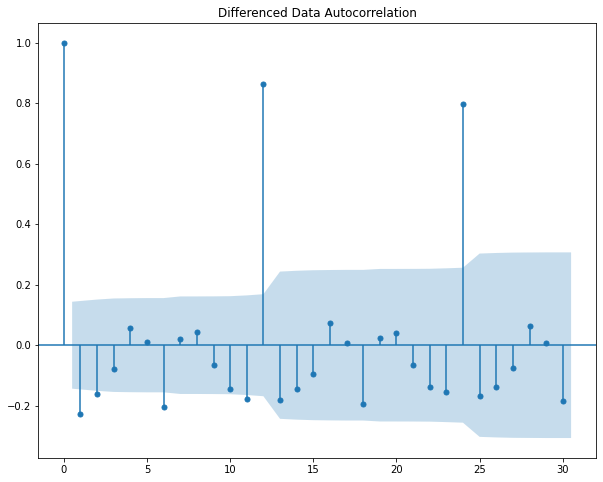

In [135]:
plot_acf(df['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plt.show()

### auto sarima model

In [136]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [137]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [138]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844335
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640237249
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388217
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791635
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.205415861703
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920838
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.76886495666
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572931527
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183827
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319377729
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319652543325
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954175425
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245089320825
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018823619597
SARIMA(0, 1, 2)x

In [139]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.934564
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121563
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340402


In [141]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Wed, 14 Jul 2021   AIC                           1555.584
Time:                                    02:20:26   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

In [142]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [143]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.431733,388.343933,566.291610,2088.571855
1,1315.125341,402.004529,527.210942,2103.039739
2,1621.626414,401.998133,833.724551,2409.528277
3,1598.888393,407.234695,800.723058,2397.053728
4,1392.720175,407.964636,593.124182,2192.316167


In [144]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.5949106740883


In [145]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1375.191113
"SARIMA(1,1,2)(1,0,2,12)",528.594911


In [146]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.413
Date:                            Wed, 14 Jul 2021   AIC                           2360.827
Time:                                    02:20:59   BIC                           2382.309
Sample:                                01-01-1980   HQIC                          2369.551
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6609      0.242     -2.733      0.006      -1.135      -0.187
ma.L1         -0.2739      0.200   

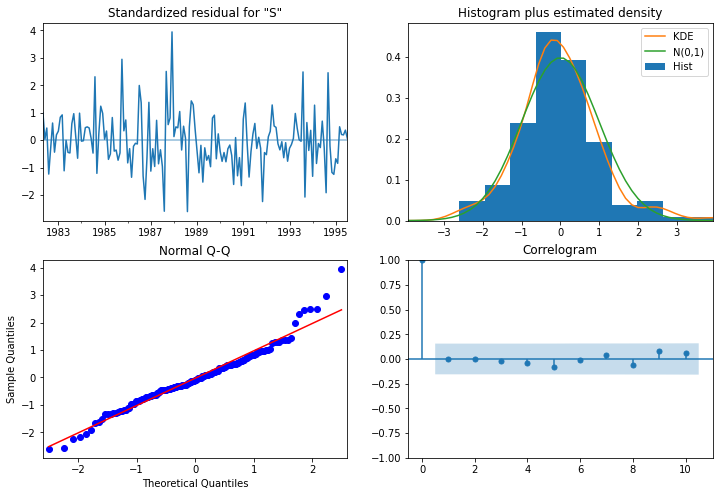

In [147]:
plt.rcParams['figure.figsize'] = [12, 8]
results_full_data_model.plot_diagnostics()
plt.show()

In [148]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=13)

In [149]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1836.354120,379.710816,1092.134596,2580.573644
1995-09-01,2489.608194,384.474770,1736.051491,3243.164897
1995-10-01,3324.588454,384.580551,2570.824426,4078.352483
1995-11-01,4020.221790,386.338515,3263.012214,4777.431365
1995-12-01,6289.995724,386.393087,5532.679191,7047.312258


In [150]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 539.9820553893344


In [151]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='MS'))

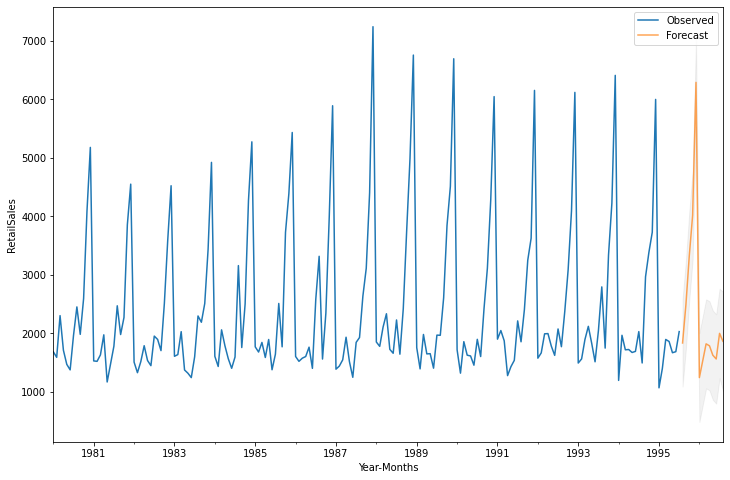

In [158]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.05)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()

In [153]:
resultsDf

,RMSE
"ARIMA(2,1,2)",1375.191113
"SARIMA(1,1,2)(1,0,2,12)",528.594911


## END